In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from subgraph_matching_via_nn.utils.utils import plot_degree_distribution, \
    plot_graph_with_colors
from subgraph_matching_via_nn.graph_processors.graph_processors import GraphProcessor

plt.rcParams["figure.figsize"] = (6, 3)  # Set the desired figure size (width, height)

In [2]:

# Set the size of the graph and the subgraph
n = 30  # Number of nodes in the graph
m = 10  # Number of nodes in the subgraph
seed = 10

# Generate a random adjacency matrix A
A_upper = np.triu(np.random.randint(0, 2, size=(n, n)), k=1)
A = A_upper + A_upper.T

# Set diagonal elements to zero to remove self-loops
np.fill_diagonal(A, 0)

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(A)
# Generate a random subset of nodes for the subgraph
subgraph_nodes = np.random.choice(G.nodes(), size=m, replace=False)

# Create the subgraph by keeping only the edges that connect the selected subset of nodes
G_sub = G.subgraph(subgraph_nodes)

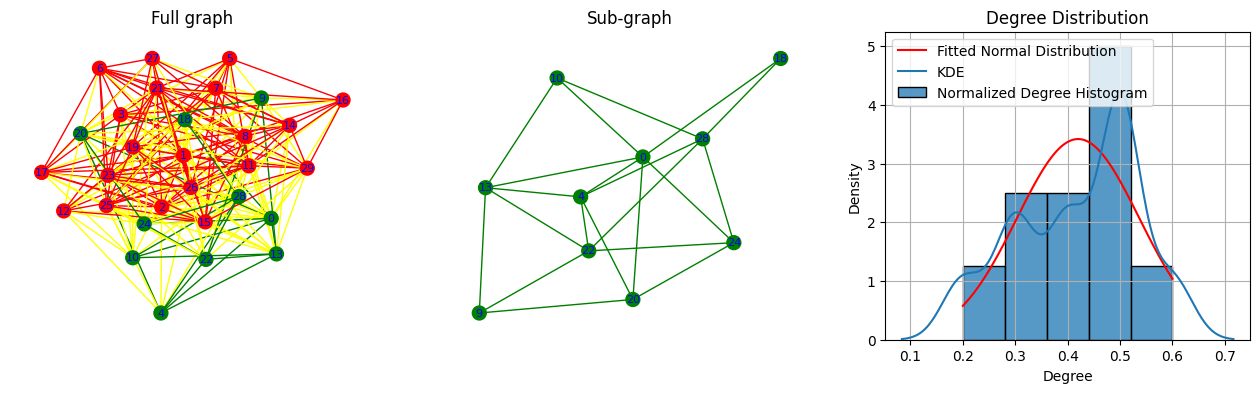

First 4 moments: ['0.4200', '0.1900', '0.0906', '0.0449']


In [3]:

# Set the indices corresponding to the subgraph nodes to 1
subgraph_node_indices = [list(G.nodes()).index(node) for node in G_sub.nodes()]
#subgraph_node_indices = list(G_sub.nodes())
w_indicator = np.zeros(len(G.nodes()))
w_indicator[subgraph_node_indices] = 1.0

# Call the function to plot the graph with colors
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
plot_graph_with_colors(G, G_sub=None, w=w_indicator, ax=axes[0], colorbar=False,
                       title='Full graph', seed=seed, draw_labels=True)
plot_graph_with_colors(G_sub, G_sub, w=None, ax=axes[1], colorbar=False,
                       title='Sub-graph', seed=seed, draw_labels=True)
# Plot degree distribution and compute first 4 moments
n_moments = 4
moments = plot_degree_distribution(G_sub, n_moments=n_moments, ax=axes[2])
plt.show()
print(f"First 4 moments: {[f'{value:.4f}' for value in moments]}")

IndexError: index 66 is out of bounds for axis 0 with size 30

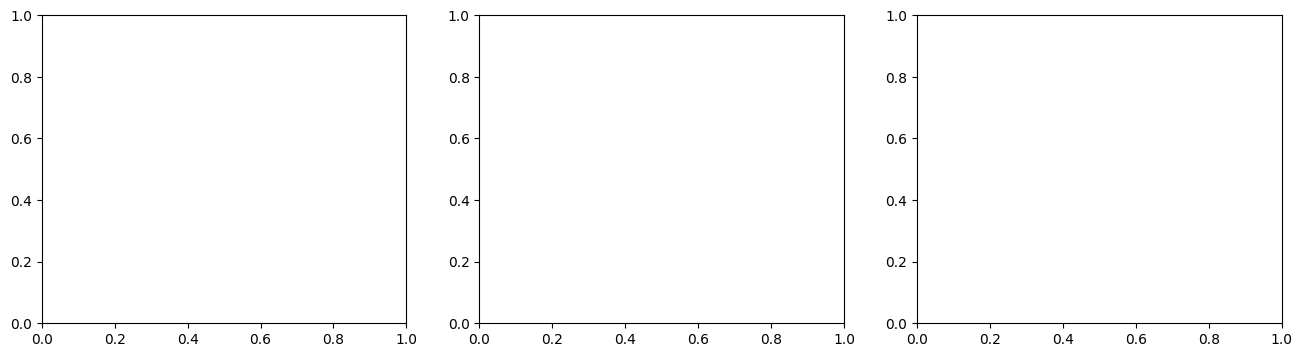

In [4]:
# Transform to line
graph_processor = GraphProcessor(to_bipartite = False,
                                 to_line = True)

processed_G = graph_processor.pre_process(G)
processed_G_sub = graph_processor.pre_process(G_sub)
# Call the function to plot the graph with colors
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
plot_graph_with_colors(processed_G, G_sub=None, w=w_indicator, ax=axes[0], colorbar=False,
                       title='Full line graph', seed=seed, draw_labels=True)
plot_graph_with_colors(processed_G_sub, processed_G_sub, w=None, ax=axes[1], colorbar=False,
                       title='line Sub-graph', seed=seed, draw_labels=True)
# Plot degree distribution and compute first 4 moments
n_moments = 4
moments = plot_degree_distribution(processed_G_sub, n_moments=n_moments, ax=axes[2])
plt.show()
print(f"First 4 moments: {[f'{value:.4f}' for value in moments]}")